In [69]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
import matplotlib.pyplot as plt

In [18]:
classes=np.load('/home/gbarchi/Documentos/Trust/OCEAN-TRUST/experiments/temp/yamnet_classes.npy')

In [75]:
df=pd.DataFrame()
files=glob.glob('/home/gbarchi/Documentos/Trust/OCEAN-TRUST/data/yamnet/classifyier_results_all/*/*')

for i,path in enumerate(files):
    filename=path.split('/')[-1].replace('.npy','.wav')
    mean_preds=np.mean(np.load(path),axis=0)
    music_prob=mean_preds[list(classes).index('Music')]
    
    df.loc[i,'filename']=filename
    df.loc[i,'music_prob']=music_prob

    if music_prob < 0.1:
        df.loc[i,'< 0.1']=1
    if music_prob < 0.2:
        df.loc[i,'< 0.2']=1
    

<AxesSubplot:>

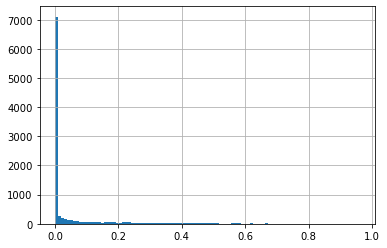

In [95]:
df['music_prob'].hist(bins=100)

In [96]:
print('Music probability < 0.1: %d' % (np.sum(df['< 0.1'])))
print('Music probability < 0.2: %d' % (np.sum(df['< 0.2'])))
print('Music probability > 0.1: %d' % (10000-np.sum(df['< 0.1'])))
print('Music probability > 0.2: %d' % (10000-np.sum(df['< 0.2'])))

Music probability < 0.1: 8335
Music probability < 0.2: 8908
Music probability > 0.1: 1665
Music probability > 0.2: 1092


Music classes 134 a 276

Speech classes [0:45] + 51,53,54

In [59]:
df=pd.DataFrame.from_dict(list(dict_.items()))

<AxesSubplot:xlabel='1', ylabel='Density'>

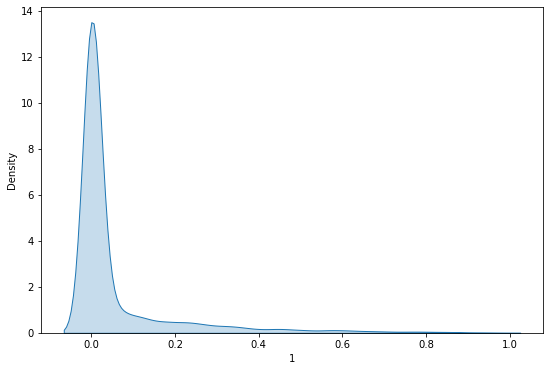

In [70]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(9, 6))
sns.distplot(df[1], hist = False, kde = True, kde_kws={"shade": True})